In [1]:
import pandas as pd
import numpy  as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

In [2]:
df_passengers=pd.read_csv('passenger.csv')
df_passengers.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,YEAR,QUARTER,MONTH,CLASS,Unnamed: 15
0,0.0,106.0,0.0,1050.0,19393,10529,30529,BDL,13487,31650,MSP,2017,1,1,F,NaN
1,0.0,810.0,0.0,1751.0,19393,10693,30693,BNA,13891,32575,ONT,2017,1,1,F,NaN
2,0.0,1281.0,0.0,1978.0,19393,10693,30693,BNA,14747,30559,SEA,2017,1,1,F,NaN
3,0.0,109.0,0.0,1668.0,19393,10800,32575,BUR,13495,33495,MSY,2017,1,1,F,NaN
4,0.0,210.0,0.0,1174.0,19393,11042,30647,CLE,10423,30423,AUS,2017,1,1,F,NaN


In [3]:
df_airlines=pd.read_csv('airline_codes.csv')
df_airlines.head()

,Code,Airline
0,19031,MAC
1,19032,XY
2,19033,COC
3,19034,GSA
4,19035,RZZ


In [4]:
df_fares=pd.read_csv('fares.csv')
df_fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_stock_prices=pd.read_csv('stock_prices.csv')
df_stock_prices.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85


In [6]:
df_stock_prices['day']=pd.to_datetime(df_stock_prices['timestamp']).dt.day
df_stock_prices['month']=pd.to_datetime(df_stock_prices['timestamp']).dt.month
df_stock_prices['year']=pd.to_datetime(df_stock_prices['timestamp']).dt.year

In [14]:
df_stock_prices_casc=df_stock_prices[['day','month','year']]
df_stock_prices_casc.loc[:,'AIRLINE_CODE'] = 'AA'
df_stock_prices_casc.loc[:,'STOCK_PRICE'] = df_stock_prices['AA']
df_stock_prices_long=df_stock_prices_casc

for col in ['UA','B6','OO','AS','NK','WN','DL','HA']:
    df_stock_prices_casc=df_stock_prices[['day','month','year']]
    df_stock_prices_casc.loc[:,'AIRLINE_CODE'] = col
    df_stock_prices_casc.loc[:,'STOCK_PRICE'] = df_stock_prices[col]
    
    df_stock_prices_long=df_stock_prices_long.append(df_stock_prices_casc)
    

df_stock_prices_long=df_stock_prices_long.reset_index()
df_stock_prices_long=df_stock_prices_long.drop(columns=['index'])

df_stock_prices_long = df_stock_prices_long.groupby(
        ['AIRLINE_CODE','year', 'month'], as_index = False).agg({'STOCK_PRICE': 'mean'})

df_stock_prices_long.rename(columns={'year':'YEAR', 'month':'MONTH'}, inplace=True)

df_stock_prices_long

,AIRLINE_CODE,YEAR,MONTH,STOCK_PRICE
0,AA,2016,10,39.043810
1,AA,2016,11,43.776667
2,AA,2016,12,47.822857
3,AA,2017,1,47.139000
4,AA,2017,2,46.006842
...,...,...,...,...
166,WN,2017,12,64.127500
167,WN,2018,1,63.608095
168,WN,2018,2,57.800526
169,WN,2018,3,58.535238


In [8]:
# remove all rows that are not flown by the specific airlines

#valid_airlines = ['UA','B6','OO','AS','NK','WN','DL','HA']
valid_airlines = [19977,20409,20304,19930,20416,19393,19790,19690]

df_passengers_valid = df_passengers.loc[df_passengers['AIRLINE_ID'] == 19805]


for airline in valid_airlines:
    temp = df_passengers.loc[df_passengers['AIRLINE_ID'] == airline]
    df_passengers_valid = df_passengers_valid.append(temp)



# add 2-letter airline code to passenger data

df_passengers_valid['AIRLINE_CODE'] = ''
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 19805,'AIRLINE_CODE'] = 'AA'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 19977,'AIRLINE_CODE'] = 'UA'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 20409,'AIRLINE_CODE'] = 'B6'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 20304,'AIRLINE_CODE'] = 'OO'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 19930,'AIRLINE_CODE'] = 'AS'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 20416,'AIRLINE_CODE'] = 'NK'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 19393,'AIRLINE_CODE'] = 'WN'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 19790,'AIRLINE_CODE'] = 'DL'
df_passengers_valid.loc[df_passengers_valid['AIRLINE_ID'] == 19690,'AIRLINE_CODE'] = 'HA'

df_passengers_valid

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,YEAR,QUARTER,MONTH,CLASS,Unnamed: 15,AIRLINE_CODE
4956,0.0,25.0,0.0,719.0,19805,11278,30852,DCA,15016,31123,STL,2017,1,1,F,NaN,AA
4957,0.0,0.0,1541.0,2213.0,19805,14107,30466,PHX,10529,30529,BDL,2017,1,1,F,NaN,AA
8631,0.0,34.0,0.0,0.0,19805,12892,32575,LAX,12892,32575,LAX,2017,2,5,F,NaN,AA
8632,0.0,182.0,0.0,1927.0,19805,14100,34100,PHL,14869,34614,SLC,2017,2,5,F,NaN,AA
14110,0.0,8471.0,0.0,473.0,19805,10581,30581,BGR,14100,34100,PHL,2017,4,12,F,NaN,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251482,80631.0,172669.0,0.0,100.0,19690,13830,33830,OGG,12173,32134,HNL,2017,3,8,F,NaN,HA
251487,82854.0,171683.0,0.0,100.0,19690,13830,33830,OGG,12173,32134,HNL,2017,4,12,F,NaN,HA
251488,83063.0,173281.0,0.0,100.0,19690,13830,33830,OGG,12173,32134,HNL,2017,3,7,F,NaN,HA
251490,84080.0,445637.0,0.0,100.0,19690,12173,32134,HNL,13830,33830,OGG,2017,3,7,F,NaN,HA


In [9]:
# merge passenger and stock dataframes

df_passenger_stock = pd.merge(df_passengers_valid, df_stock_prices_long, on=['AIRLINE_CODE','YEAR','MONTH'])
df_passenger_stock

,PASSENGERS,FREIGHT,MAIL,DISTANCE,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST,YEAR,QUARTER,MONTH,CLASS,Unnamed: 15,AIRLINE_CODE,STOCK_PRICE
0,0.0,25.0,0.0,719.0,19805,11278,30852,DCA,15016,31123,STL,2017,1,1,F,NaN,AA,47.139
1,0.0,0.0,1541.0,2213.0,19805,14107,30466,PHX,10529,30529,BDL,2017,1,1,F,NaN,AA,47.139
2,1.0,0.0,0.0,910.0,19805,10257,30257,ALB,15016,31123,STL,2017,1,1,F,NaN,AA,47.139
3,1.0,0.0,0.0,406.0,19805,10529,30529,BDL,14122,30198,PIT,2017,1,1,F,NaN,AA,47.139
4,1.0,0.0,0.0,532.0,19805,10529,30529,BDL,14492,34492,RDU,2017,1,1,F,NaN,AA,47.139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106627,59974.0,72081.0,0.0,102.0,19690,12982,32982,LIH,12173,32134,HNL,2017,3,7,F,NaN,HA,45.560
106628,64040.0,79010.0,0.0,163.0,19690,12758,32758,KOA,12173,32134,HNL,2017,3,7,F,NaN,HA,45.560
106629,65951.0,218007.0,0.0,163.0,19690,12173,32134,HNL,12758,32758,KOA,2017,3,7,F,NaN,HA,45.560
106630,83063.0,173281.0,0.0,100.0,19690,13830,33830,OGG,12173,32134,HNL,2017,3,7,F,NaN,HA,45.560


Airline: AA


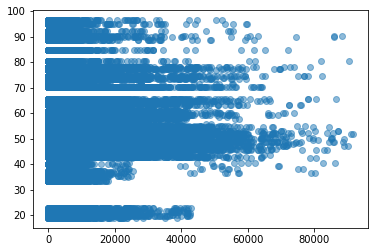

Pearsons correlation: -0.004
Airline: UA


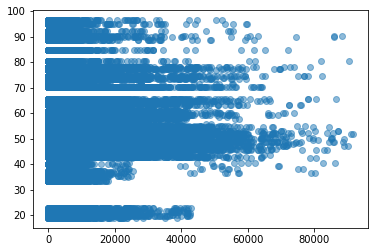

Pearsons correlation: -0.004
Airline: B6


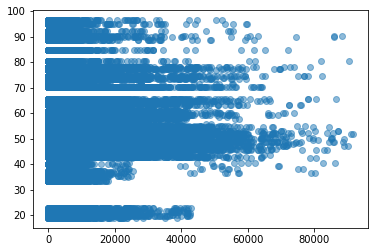

Pearsons correlation: -0.004
Airline: OO


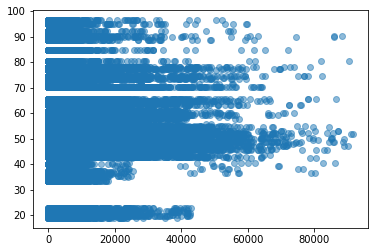

Pearsons correlation: -0.004
Airline: AS


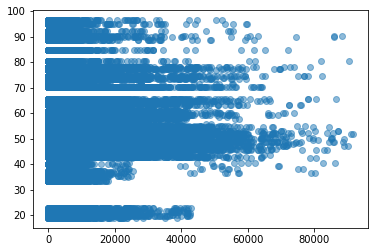

Pearsons correlation: -0.004
Airline: NK


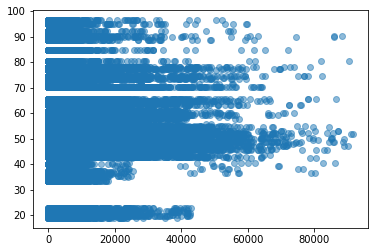

Pearsons correlation: -0.004
Airline: WN


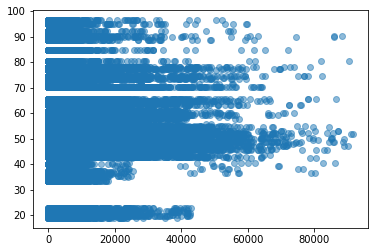

Pearsons correlation: -0.004
Airline: DL


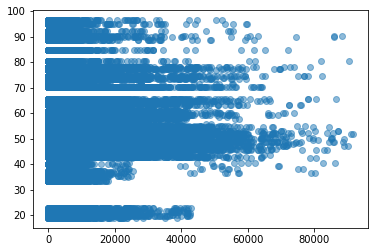

Pearsons correlation: -0.004
Airline: HA


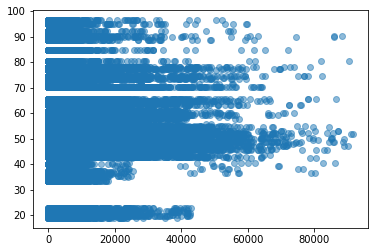

Pearsons correlation: -0.004


In [10]:
# Plot stock prices against number of passengers 
    
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    temp = df_passenger_stock.loc[df_passenger_stock.AIRLINE_CODE == col]
    plt.scatter(df_passenger_stock['PASSENGERS'],
                df_passenger_stock['STOCK_PRICE'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        df_passenger_stock['PASSENGERS'], df_passenger_stock['STOCK_PRICE'])
    print('Pearsons correlation: %.3f' % corr)
    

Airline: AA


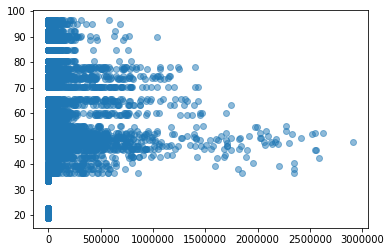

Pearsons correlation: 0.050
Airline: UA


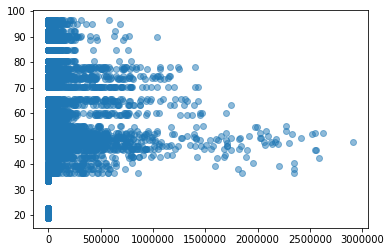

Pearsons correlation: 0.050
Airline: B6


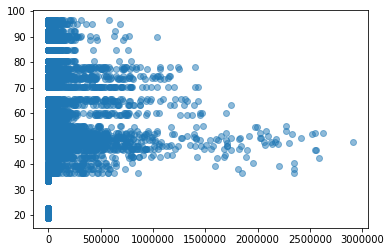

Pearsons correlation: 0.050
Airline: OO


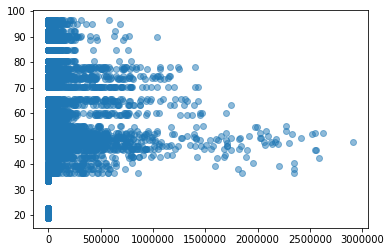

Pearsons correlation: 0.050
Airline: AS


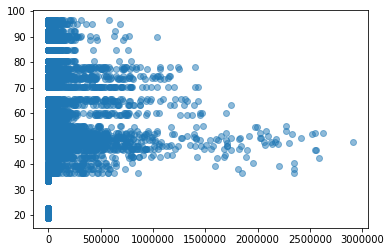

Pearsons correlation: 0.050
Airline: NK


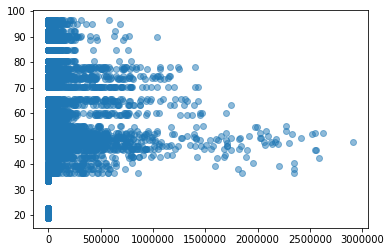

Pearsons correlation: 0.050
Airline: WN


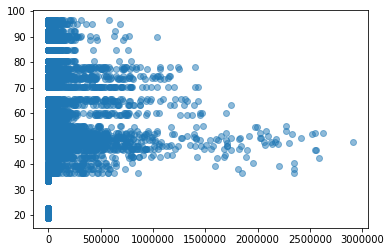

Pearsons correlation: 0.050
Airline: DL


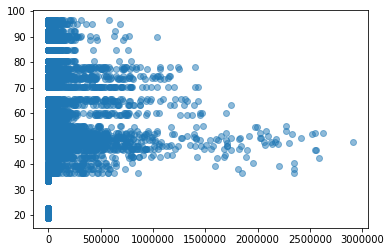

Pearsons correlation: 0.050
Airline: HA


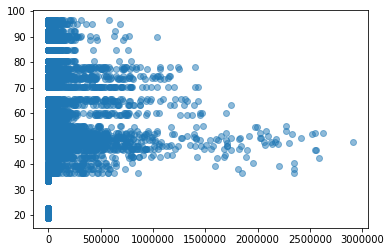

Pearsons correlation: 0.050


In [11]:
# Plot stock prices against freight
    
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    temp = df_passenger_stock.loc[df_passenger_stock.AIRLINE_CODE == col]
    plt.scatter(df_passenger_stock['FREIGHT'],
                df_passenger_stock['STOCK_PRICE'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        df_passenger_stock['FREIGHT'], df_passenger_stock['STOCK_PRICE'])
    print('Pearsons correlation: %.3f' % corr)
    

Airline: AA


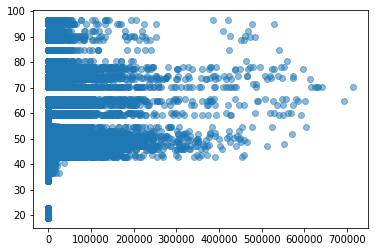

Pearsons correlation: 0.099
Airline: UA


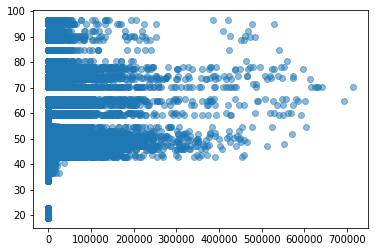

Pearsons correlation: 0.099
Airline: B6


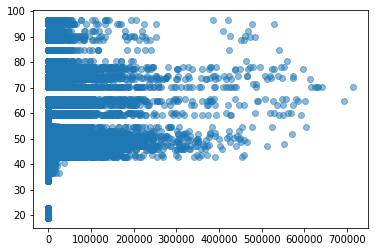

Pearsons correlation: 0.099
Airline: OO


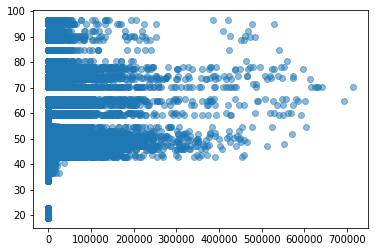

Pearsons correlation: 0.099
Airline: AS


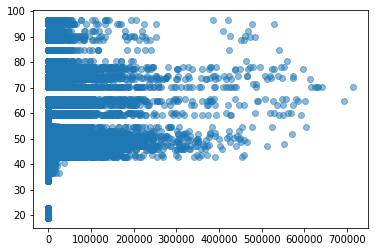

Pearsons correlation: 0.099
Airline: NK


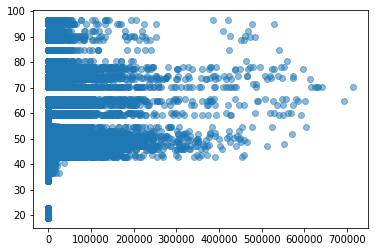

Pearsons correlation: 0.099
Airline: WN


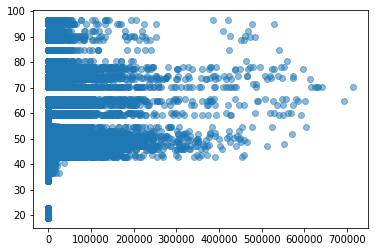

Pearsons correlation: 0.099
Airline: DL


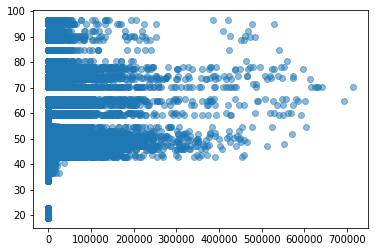

Pearsons correlation: 0.099
Airline: HA


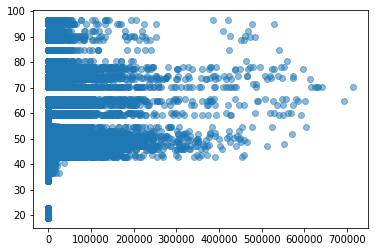

Pearsons correlation: 0.099


In [12]:
# Plot stock prices against mail
    
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    temp = df_passenger_stock.loc[df_passenger_stock.AIRLINE_CODE == col]
    plt.scatter(df_passenger_stock['MAIL'],
                df_passenger_stock['STOCK_PRICE'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        df_passenger_stock['MAIL'], df_passenger_stock['STOCK_PRICE'])
    print('Pearsons correlation: %.3f' % corr)
    